In [1]:
# Import some useful stuff
import seaborn as sns
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.decomposition import PCA

# Allow inline plots
%matplotlib inline

# Import breast cancer data set
from sklearn.datasets import load_breast_cancer
cancer_data = load_breast_cancer(as_frame=True)


In [2]:
###################
# Data Exploration
###################

# Have a look at our data
cancer_data.data


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


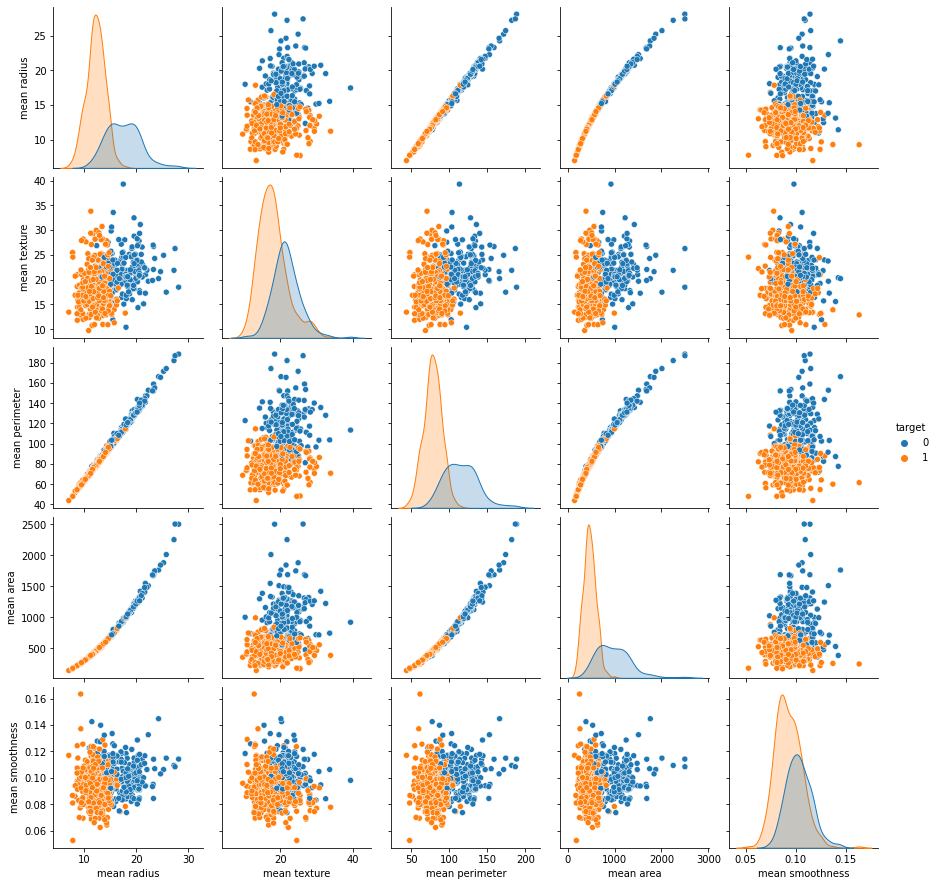

In [3]:
# Plot some variables to have a look
# Tack on the target to the end so we can color code it
cancer_data_pair = cancer_data.data[cancer_data.data.columns[0:10]].copy()
cancer_data_pair['target'] = cancer_data.target.copy()
sns.pairplot(cancer_data_pair, hue='target', vars=['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness'])

<AxesSubplot:>

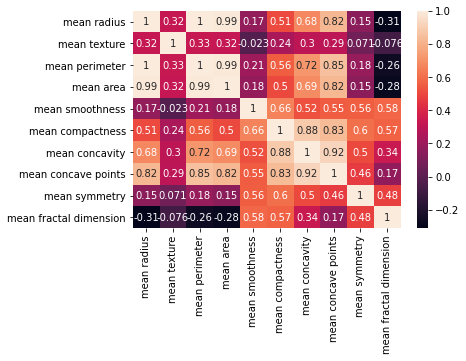

In [4]:
# Cool, now lets check out correlation between features. 
# Only really care about first 10
sns.heatmap(cancer_data.data[cancer_data.data.columns[0:10]].corr(), annot=True)

Something interesting we can see...
It appears that there are 5 features which have correlation scores above 0.50, I wonder if we can use that to our advantage

In [5]:
# First, lets try and validate our choice of SVM with k-fold validation

df = cancer_data.data
X = df.iloc[:,:-1]
y = cancer_data.target

k = 5
kf = KFold(n_splits=k, random_state=None)
model = SVC(kernel='linear')
 
result = cross_val_score(model , X, y, cv = kf)
 
print("k-fold Result: %f accuracy with a standard deviation of %0.2f" % (result.mean(), result.std()))

k-fold Result: 0.950784 accuracy with a standard deviation of 0.02


In [6]:
# Aight let's get to training our model. We are going to use a Support Vector Machine (SVM) to classify tumors as either benign or malignant.
# Set data to 'X' and class lables to 'y' for convenience

X = cancer_data.data
y = cancer_data.target

results = []

# Let test size vary from 10% to 90% of dataset
test_size_range = [x * 0.1 for x in range(1, 10)]

for size in test_size_range:
    train_size = 1 - size
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = size, random_state=20)

    # Now for SVM training
    svc_model = SVC(kernel='linear')
    svc_model.fit(X_train, y_train)

    # Predict using model
    y_pred = svc_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results.append( (round(train_size,1), round(size,1), round(accuracy,4)) )

print("SVM Results: ", results)


SVM Results:  [(0.9, 0.1, 0.9649), (0.8, 0.2, 0.9561), (0.7, 0.3, 0.9532), (0.6, 0.4, 0.9518), (0.5, 0.5, 0.9474), (0.4, 0.6, 0.9532), (0.3, 0.7, 0.9348), (0.2, 0.8, 0.9364), (0.1, 0.9, 0.9318)]


# SVM Results
| Train Size | Test Size | Accuracy |
| --- | --- | --- |
| 0.9 | 0.1 | 0.9649 |
| 0.8 | 0.2 | 0.9561 |
| 0.7 | 0.3 | 0.9532 |
| 0.6 | 0.4 | 0.9518 |
| 0.5 | 0.5 | 0.9474 |
| 0.4 | 0.6 | 0.9532 |
| 0.3 | 0.7 | 0.9348 |
| 0.2 | 0.8 | 0.9364 |
| 0.1 | 0.9 | 0.9318 |

So as we can see, we get the best results using a 60/40 split of training to testing data

              precision    recall  f1-score   support

           0       0.91      0.96      0.93        80
           1       0.98      0.95      0.96       148

    accuracy                           0.95       228
   macro avg       0.94      0.95      0.95       228
weighted avg       0.95      0.95      0.95       228



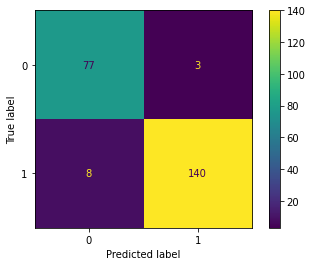

In [7]:
# Have a look at the confusion matirix for our best result split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=20)

# Now for SVM training
svc_model = SVC(kernel='linear')
svc_model.fit(X_train, y_train)

# Predict using model
y_pred = svc_model.predict(X_test)

# Plot confusion matrix
plot_confusion_matrix(svc_model, X_test, y_test)

# Show classification report
print(classification_report(y_test, y_pred))


In [8]:
# Now let's try normailizing our data to see if we get better results

# Create a min/max processor object
min_max_scalar = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scalar.fit_transform(cancer_data.data)

cancer_data_normalized = pd.DataFrame(x_scaled, columns=cancer_data.feature_names)

# Repeat the above with the normalized data
X_normalized = cancer_data_normalized
y = cancer_data.target

results = []

# Let test size vary from 10% to 90% of dataset
test_size_range = [x * 0.1 for x in range(1, 10)]

for size in test_size_range:
    train_size = 1 - size
    X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size = size, random_state=20)

    # Now for SVM training
    svc_model = SVC(kernel='linear')
    svc_model.fit(X_train, y_train)

    # Predict using model
    y_pred = svc_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results.append( (round(train_size,1), round(size,1), round(accuracy,4)) )

print("SVM Results (Normalized): ", results)


SVM Results (Normalized):  [(0.9, 0.1, 0.9825), (0.8, 0.2, 0.9912), (0.7, 0.3, 0.9942), (0.6, 0.4, 0.9825), (0.5, 0.5, 0.9719), (0.4, 0.6, 0.9678), (0.3, 0.7, 0.9724), (0.2, 0.8, 0.9693), (0.1, 0.9, 0.9474)]


# SVM Results (Normalized)
| Train Size | Test Size | Accuracy |
| --- | --- | --- |
| 0.9 | 0.1 | 0.9825 |
| 0.8 | 0.2 | 0.9912 |
| 0.7 | 0.3 | 0.9942 |
| 0.6 | 0.4 | 0.9825 |
| 0.5 | 0.5 | 0.9719 |
| 0.4 | 0.6 | 0.9678 |
| 0.3 | 0.7 | 0.9724 |
| 0.2 | 0.8 | 0.9693 |
| 0.1 | 0.9 | 0.9474 |

So as we can see, we get the best results using a 70/30 split of training to testing data

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        48
           1       0.99      1.00      0.99        66

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



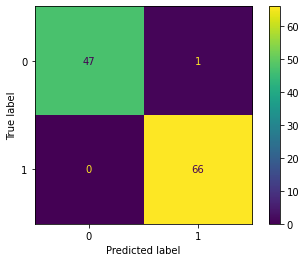

In [9]:
# Have a look at the confusion matirix for our best result split (Normalized)
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size = 0.2, random_state=20)

# Now for SVM training
from sklearn.svm import SVC
svc_model = SVC(kernel='linear')

svc_model.fit(X_train, y_train)

# Predict using model
y_pred = svc_model.predict(X_test)

# Plot confusion matrix
plot_confusion_matrix(svc_model, X_test, y_test)

# Show classification report
print(classification_report(y_test, y_pred))

In [10]:
# Might as well validate our choice of SVM with k-fold using the normalized data too

df = X_normalized
X = df.iloc[:,:-1]
y = cancer_data.target

k = 5
kf = KFold(n_splits=k, random_state=None)
model = SVC(kernel='linear')
 
result = cross_val_score(model , X, y, cv = kf)
 
print("k-fold Result: %f accuracy with a standard deviation of %0.2f" % (result.mean(), result.std()))

k-fold Result: 0.975408 accuracy with a standard deviation of 0.01


In [11]:
# Okay, finally let's check if we can reduce the feature set with PCA.

# Let num components vary from 1 to 20
n_comp_range = range(1, 21)
results_pca = []

for n_components in n_comp_range:
    cancer_pca = PCA(n_components=n_components)
    cancer_pca.fit(X_normalized)

    # Apply the transfrorm to the data
    X_normalized_pca = cancer_pca.transform(X_normalized)

    # Use 80/20 split as discovered above
    X_train, X_test, y_train, y_test = train_test_split(X_normalized_pca, y, test_size = 0.2, random_state=20)

    # Now for SVM training
    svc_model = SVC(kernel='linear')
    svc_model.fit(X_train, y_train)

    # Predict using model
    y_pred = svc_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results_pca.append( (n_components, round(accuracy,4)) )

print("SVM Results (Normalized/PCA): ", results_pca)

SVM Results (Normalized/PCA):  [(1, 0.9386), (2, 0.9561), (3, 0.9737), (4, 0.9737), (5, 0.9825), (6, 0.9825), (7, 0.9912), (8, 0.9825), (9, 0.9912), (10, 0.9912), (11, 0.9912), (12, 0.9912), (13, 0.9912), (14, 0.9912), (15, 0.9912), (16, 0.9912), (17, 0.9912), (18, 0.9912), (19, 0.9912), (20, 0.9912)]


# SVM Results (Normalized/PCA)

| Num Components | Accuracy |
|--- |--- |
| 1  | 0.9386 |
| 2  | 0.9561 |
| 3  | 0.9737 |
| 4  | 0.9727 |
| 5  | 0.9825 |
| 6  | 0.9825 |
| 7  | 0.9912 |
| 8  | 0.9825 |
| 9  | 0.9912 |
| 10 | 0.9912 |
| 11 | 0.9912 |
| 12 | 0.9912 |
| 13 | 0.9912 |
| 14 | 0.9912 |
| 15 | 0.9912 |
| 16 | 0.9912 |
| 17 | 0.9912 |
| 18 | 0.9912 |
| 19 | 0.9912 |
| 20 | 0.9912 |

As we can see above, we achieve sufficient accuracy using anything above 4 components.
Sweet! So any new samples that we recieve, we will first normalize, then pass decompose with PCA to 5 components before running through our model.


In [12]:
# Let's go ahead and train the final model

# Use 80/20 split as discovered above
X_train, X_test, y_train, y_test = train_test_split(X_normalized_pca, y, test_size = 0.2, random_state=20)

# Now for SVM training
svc_model = SVC(kernel='linear')
svc_model.fit(X_train, y_train)

# Predict using model
y_pred = svc_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Show classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.98      0.99        48
           1       0.99      1.00      0.99        66

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



Sweet! As before we see 99% accuracy